<img src="https://i.imgur.com/1gfldyb.png" alt="Drawing" style="width: 700px;"/>

Датасет, спользованный в исслеовании - ссылка на kaggle: https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog


__Цель исследования:__ Проследить влияние различных характеристик машин, собранных с объявлений на сайтах по продаже машин, на цену, за которая машина продается. 

__Задачи:__ Определить, какие характеристики влияют сильно на цену лота, какие не влияют, какие влияют в меньшей степени. Провести сравнение моделей, и выбрать лучшую. Просвести предварительный анализ собранных данных.

__Актуальность__: В описании к данному датасету сказано, что он собран 2 декабря 2019 года. То есть данные достаточно свежие, и относятся к предкоронавирусному, то есть предкризисному периоду. Данные содержат типичные характеристики машин, и их цену продажи, что в теории позволит выявить закономерности присущие всем рынкам по продаже машин.

# Обработка датасета:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import pylab
import scipy.stats

In [4]:
df = pd.read_csv('cars.csv')

Cырая таблица, загруженная с Kaggle:

In [5]:
df.head(5) 

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


Убираем странные переменные:

In [6]:
df = df.drop(columns=["feature_0", "feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7",
                 "feature_8", "feature_9"]) 

In [7]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


__Какие закономерности могут быть в данных и какие закономерности интересно исследовать?__
    
1. Чем больше значение переменной пробег (`odometer_value`) , тем меньше цена машины.     

2. Чем старше машина (`year_produced`), тем может быть ее цена меньше, хотя совершенно не факт.

3. Интересно проследить, какая зависимость цены от типа бензина, на котром ездит машина (`engine_type`). В нашем исследовании мы будем рассматривать только 2 типа - это бензин и дизель. 

4. Скорее всего, чем больше литраж двигателя (`engine_capacity`), тем мощнее машина, и тем дороже она будет стоить.

5. Интересно как влияет на цену количество фото в объявлении (`number_of_photos`).


__Предположительные гипотезы:__ 

1. Можно проверить различие между переменными `engine_fuel` и `engine_type`. Нужно ли использовать обе, потому что кажется, что можно ограничится только `engine_type`
2. Гипотезу на совместную незначимость коэффициентов 

Определяем категориальные и числовые переменные:

In [8]:
numeric_data = df.select_dtypes([np.number, np.int])
numeric_features = numeric_data.columns
print(numeric_features)

Index(['odometer_value', 'year_produced', 'engine_capacity', 'price_usd',
       'number_of_photos', 'up_counter', 'duration_listed'],
      dtype='object')


C:\Users\lashm\AppData\Local\Temp/ipykernel_4492/2934970324.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_data = df.select_dtypes([np.number, np.int])


In [9]:
categorical = list(df.dtypes[(df.dtypes == "object") | (df.dtypes == "bool")].index)
print(categorical)

['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain', 'is_exchangeable', 'location_region']


Убираем почти все категориальные переменные из исследования, оставляем дамми переменные:

In [10]:
df = df[['odometer_value', 
    'year_produced', 
    'engine_capacity', 
    'number_of_photos', 
    'duration_listed', 
     'transmission', 
     'engine_type',
      "engine_fuel", # потенциально ненужный признак
      "engine_has_gas", # потенциально ненужный признак
     'has_warranty', 
     'is_exchangeable', 
     'price_usd']] # Y - зависимая переменная

In [11]:
df["engine_fuel"].value_counts()

gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: engine_fuel, dtype: int64

Будем рассматривать только переменные `engine_fuel`, равные gasoline или diesel

In [12]:
df = df[(df["engine_fuel"] == "gasoline") | (df["engine_fuel"] == "diesel")]

Переменная `engine_has_gas` получается неинформативной, удаляем её:

In [13]:
df["engine_has_gas"].value_counts()

False    36937
Name: engine_has_gas, dtype: int64

In [14]:
df = df.drop(columns = "engine_has_gas")

In [15]:
df.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,transmission,engine_type,engine_fuel,has_warranty,is_exchangeable,price_usd
0,190000,2010,2.5,9,16,automatic,gasoline,gasoline,False,False,10900.00
1,290000,2002,3.0,12,83,automatic,gasoline,gasoline,False,True,5000.00
2,402000,2001,2.5,4,151,automatic,gasoline,gasoline,False,True,2800.00
3,10000,1999,3.0,9,86,mechanical,gasoline,gasoline,False,True,9999.00
4,280000,2001,2.5,14,7,automatic,gasoline,gasoline,False,True,2134.11


In [16]:
df["is_exchangeable"].value_counts()

False    23958
True     12979
Name: is_exchangeable, dtype: int64

Таким образом будем учитывать только машины, которые ездят либо на бензине, либо на дизеле в нашем исследовании

Преобразовываем переменные `transmission`, `engine_type`, `engine_fuel`, `has_warranty`, `is_exchangeable` в дамми переменые: 

In [17]:
# df = df[df["engine_type"] != "electric"]
filt1 = (df["transmission"] == "mechanical")
filt2 = (df["transmission"] == "automatic")

filt3 = (df["has_warranty"] == True)
filt4 = (df["has_warranty"] == False)

filt5 = (df["is_exchangeable"] == True)
filt6 = (df["is_exchangeable"] == False)

filt7 = (df["engine_type"] == "gasoline")
filt8 = (df["engine_type"] == "diesel")

filt9 = (df["engine_fuel"] == "gasoline")
filt10 = (df["engine_fuel"] == "diesel")


df.loc[filt1, "transmission"] = 1 #механич
df.loc[filt2, "transmission"] = 0 #автомат

df.loc[filt3, "has_warranty"] = 1 #да
df.loc[filt4, "has_warranty"] = 0 #нет

df.loc[filt5, "is_exchangeable"] = 1 #да
df.loc[filt6, "is_exchangeable"] = 0 #нет

df.loc[filt7, "engine_type"] = 1 #gasoline
df.loc[filt8, "engine_type"] = 0 #diesel

df.loc[filt9, "engine_fuel"] = 1 #gasoline
df.loc[filt10, "engine_fuel"] = 0 #diesel

In [18]:
df.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,transmission,engine_type,engine_fuel,has_warranty,is_exchangeable,price_usd
0,190000,2010,2.5,9,16,0,1,1,0,0,10900.00
1,290000,2002,3.0,12,83,0,1,1,0,1,5000.00
2,402000,2001,2.5,4,151,0,1,1,0,1,2800.00
3,10000,1999,3.0,9,86,1,1,1,0,1,9999.00
4,280000,2001,2.5,14,7,0,1,1,0,1,2134.11


Оставляем только 1000 наблюдений:

In [19]:
df = df.head(1000)

In [20]:
df.describe() #статистики датасета

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,price_usd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,187199.721000,2006.220000,2.215300,10.213000,78.020000,7043.311020
std,125183.040352,7.687307,0.638046,6.534089,112.764345,5490.390942
min,0.000000,1977.000000,1.000000,1.000000,0.000000,120.000000
25%,93835.500000,2001.000000,1.700000,6.000000,19.000000,2900.000000
50%,180000.000000,2007.000000,2.000000,9.000000,57.000000,6000.000000
75%,263223.750000,2013.000000,2.500000,14.000000,88.000000,9900.000000
max,1000000.000000,2019.000000,5.900000,56.000000,1322.000000,35900.000000


In [21]:
df.to_csv('original_data.csv') #датасет для исследования

### Описание переменных датасета:

__Зависимая переменная:__ <br>
`price_usd` - Цена машины в USD (долларах) <br>

__Независимые переменные (количественные):__  <br>
1. `odometer_value` - Пробег в км <br>
2. `year_produced` - Год производства машины <br>
3. `engine_capacity` - Объем двигателя в литрах<br>
4. `number_of_photos` - Кол-во фото в объявлении<br>
5. `duration_listed` - Кол-во дней, которое объявление висит на сатйте <br>

__Независимые переменные(дамми):__<br>
1. `transmission` [тип трансмисси] - (1 - mechanical, 0 - automatic)<br>
2. `engine_type` [тип двигателя] - (1 - gasoline, 0 - diesel)<br>
3. `engine_fuel` [тип бензина] - (1 - gasoline, 0 - diesel)<br>
4. `color` [цвет машины] - (1 - black, 0 - silver)    <br>
5. `has_warranty` [страховка] - (1 - True, 0 - False)<br>
6. `is_exchangeable` [владелец согласен обменять свою машину на другую, с доплатой или без] - (1 - True, 0 - False)<br>

 
Данные на 2 декабря 2019 года.                                                                                                                                    "

### Проверка данных на нормальность:

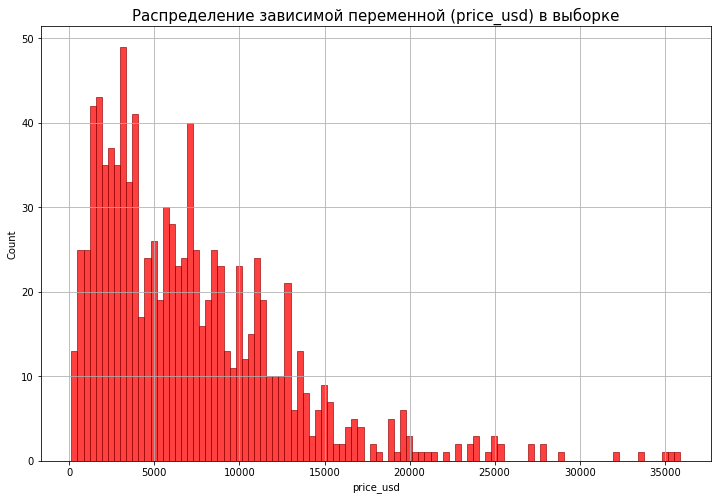

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Распределение зависимой переменной (price_usd) в выборке', fontsize=15)
sns.histplot(df["price_usd"], bins=100, ax=ax, color='red', edgecolor="darkred")
plt.grid()
plt.show()

Видим, что Y не распределен нормально.

Также можно построить QQ-plot:

Тест взят отсюда: https://www.statology.org/normality-test-python/

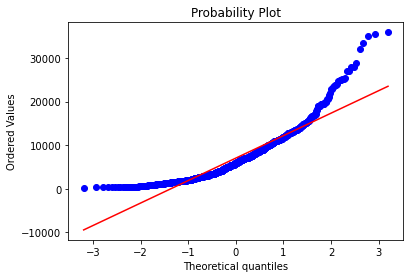

In [23]:
stats.probplot(df["price_usd"], dist="norm", plot=pylab) ##QQ Plot
pylab.show()

Видим также, что Y не распределен нормально (не лежит на прямой)

__Построим также boxplot графики для дамми-переменных и зависимой переменной:__

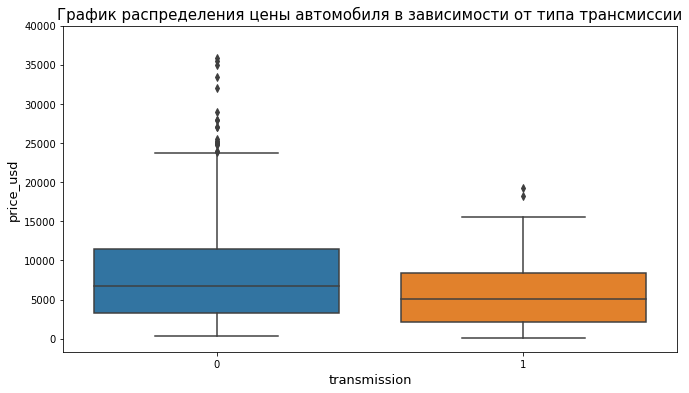

In [24]:
plt.figure(figsize = (11, 6))
plt.title('График распределения цены автомобиля в зависимости от типа трансмиссии', fontsize=15)
plt.xlabel('transmission', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
sns.boxplot(data=df, y="price_usd", x="transmission")
plt.yticks(np.arange(0, max(df["price_usd"]+5000), 5000))
plt.show()

Мы видим, что медианная цена автомобилей с механической коробкой передач (дамми - 1) ниже, чем у автомобилей с автоматической коробкой передач. 
А также 75% автомобилей с автоматической коробкой передач стоят не дороже 13000$.  

Тогда как 75% автомобилей с механической коробкой передач стоят не дороже 10000$

При этом мы видим, что очень много точек лежит за пределами "усов" у автоматической коробки передач (много выбросов). 

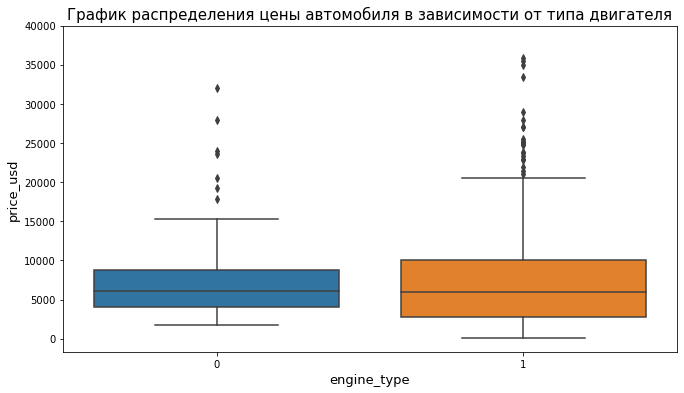

In [25]:
plt.figure(figsize = (11, 6))
plt.title('График распределения цены автомобиля в зависимости от типа двигателя', fontsize=15)
plt.xlabel('transmission', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
sns.boxplot(data=df, y="price_usd", x="engine_type")
plt.yticks(np.arange(0, max(df["price_usd"]+5000), 5000))
plt.show()

Видим, что машины с дизельным двигателем (дамми 0) находятся в более узком диапазаоне цен, чем машины с бензиновым двигателем (дамми 1).

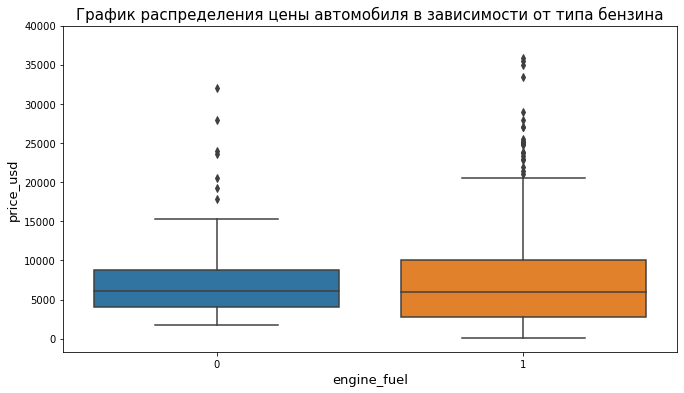

In [26]:
plt.figure(figsize = (11, 6))
plt.title('График распределения цены автомобиля в зависимости от типа бензина', fontsize=15)
plt.xlabel('transmission', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
sns.boxplot(data=df, y="price_usd", x="engine_fuel")
plt.yticks(np.arange(0, max(df["price_usd"]+5000), 5000))
plt.show()

Та же самая картина для топлива для двигателя, что и на графике выше

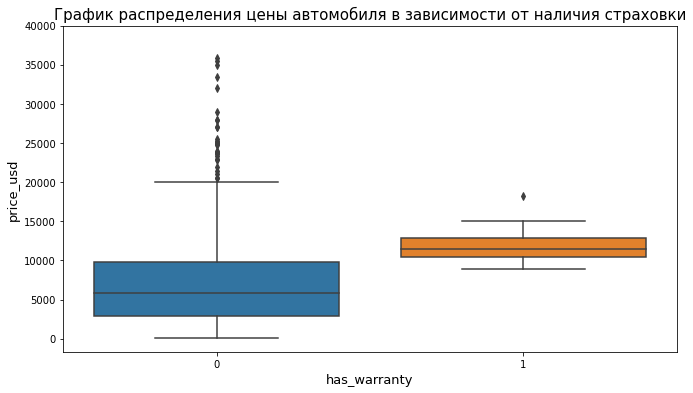

In [27]:
plt.figure(figsize = (11, 6))
plt.title('График распределения цены автомобиля в зависимости от наличия страховки', fontsize=15)
plt.xlabel('transmission', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
sns.boxplot(data=df, y="price_usd", x="has_warranty")
plt.yticks(np.arange(0, max(df["price_usd"]+5000), 5000))
plt.show()

Видим, что машины, которые имеют страховку стоят очевидно дороже тех, которые страховку не имеют. Их медианная цена примерно равна 12 тыс. долларов, тогда как у машин без страховки - всего 6 тыс. долларов. Возможно, на сайтах продавались более дорогие машины, которые имели страховку. Также видим, что большое количество выбросов у машин, которые не имеют страховку.

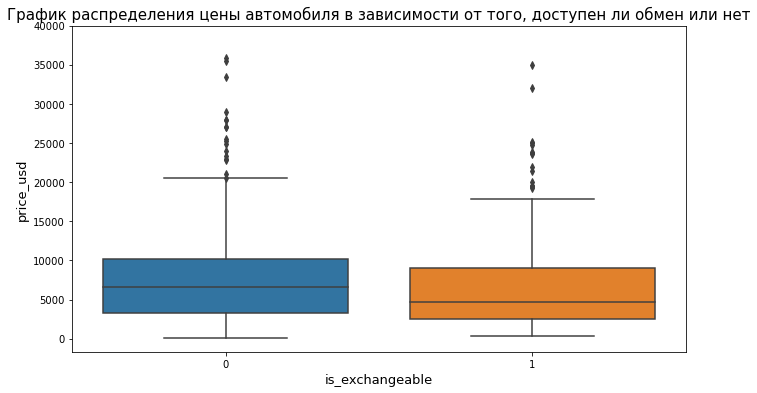

In [28]:
plt.figure(figsize = (11, 6))
plt.title('График распределения цены автомобиля в зависимости от того, доступен ли обмен или нет', fontsize=15)
plt.xlabel('transmission', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
sns.boxplot(data=df, y="price_usd", x="is_exchangeable")
plt.yticks(np.arange(0, max(df["price_usd"]+5000), 5000))
plt.show()

Видим, что наличие возможности обмена почти не различается в цене, но медианная цена машин, которые доступны для обмена немного ниже.

__Построим scatter графики:__

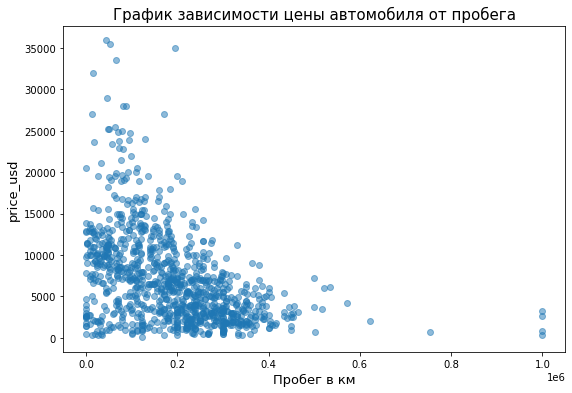

In [29]:
plt.figure(figsize = (9, 6))
plt.title('График зависимости цены автомобиля от пробега', fontsize=15)
plt.xlabel('Пробег в км', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
 
plt.scatter(x = df["odometer_value"], y = df["price_usd"], alpha=0.5 , label ="odometer_value");    

*$1e6 = 10^6$. Видим, что цена машины уменьшается пропорционально увеличению пробега машины.

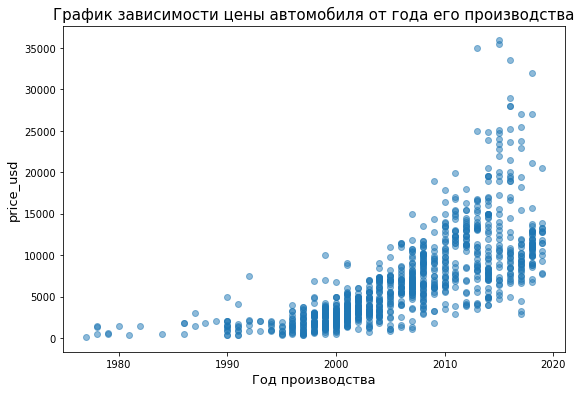

In [30]:
plt.figure(figsize = (9, 6))
plt.title('График зависимости цены автомобиля от года его производства', fontsize=15)
plt.xlabel('Год производства', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
 
plt.scatter(x = df["year_produced"], y = df["price_usd"], alpha=0.5 , label ="odometer_value");    

Видим, что чем новее автомобиль, тем он вероятнее всего дороже стоит, но есть выбросы - видимо ретро автомобили

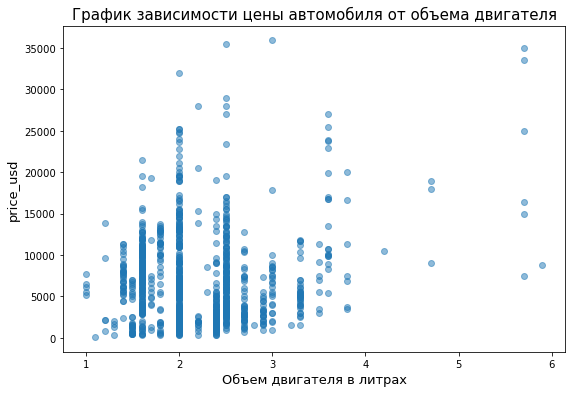

In [31]:
plt.figure(figsize = (9, 6))
plt.title('График зависимости цены автомобиля от объема двигателя', fontsize=15)
plt.xlabel('Объем двигателя в литрах', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
 
plt.scatter(x = df["engine_capacity"], y = df["price_usd"], alpha=0.5 , label ="odometer_value");    

Видим, что большинство машин имеют двигатель 1-4 литра, а самые дорогие машины имеют двигатель объемом 3 литра

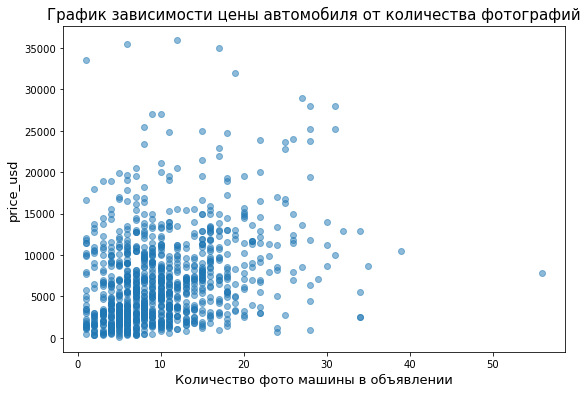

In [32]:
plt.figure(figsize = (9, 6))
plt.title('График зависимости цены автомобиля от количества фотографий', fontsize=15)
plt.xlabel('Количество фото машины в объявлении', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
 
plt.scatter(x = df["number_of_photos"], y = df["price_usd"], alpha=0.5 , label ="odometer_value");   

Видим, что в основном количество фотографий не превышает 30, но цена в этих пределах может быть практически любая, судя по графику

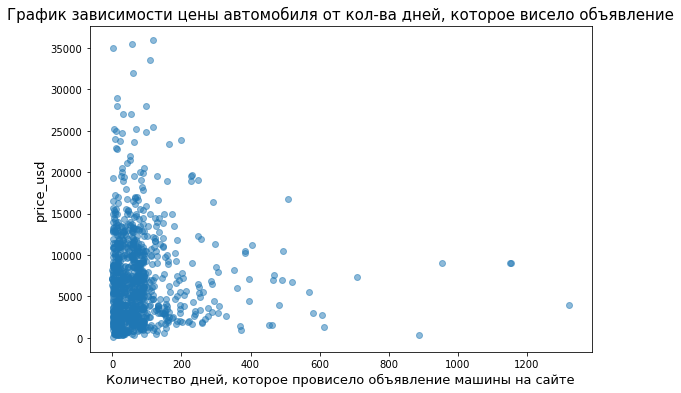

In [33]:
plt.figure(figsize = (9, 6))
plt.title('График зависимости цены автомобиля от кол-ва дней, которое висело объявление', fontsize=15)
plt.xlabel('Количество дней, которое провисело объявление машины на сайте', fontsize=13)
plt.ylabel('price_usd', fontsize=13)
 
plt.scatter(x = df["duration_listed"], y = df["price_usd"], alpha=0.5 , label ="odometer_value");  

Можем увидеть, что в основном все дорогие машины покупают за относительно меньшее количество дней, и далее дорогие машины не покупаются, если объявление долго висит.

# Выбор между моделями:

In [34]:
import statsmodels.api as sm

In [35]:
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

### Тест Зарембки

In [36]:
from scipy.stats import gmean

In [37]:
df3 = df.copy()

df3["price_usd"] = df3["price_usd"] / gmean(df3["price_usd"])
df3 = df3.rename(columns = {"price_usd" : "price_usd_gmean"})

Рассчитываем следующую линейную регрессию: <br>
<img src="https://i.imgur.com/BpOA39q.png" alt="Drawing" style="width: 250px;"/>

In [38]:
model1 = ols(
    "price_usd_gmean ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df3).fit()

Рассчитываем следующую логарифмическую регрессию: <br>
<img src="https://i.imgur.com/EGKk36V.png" alt="Drawing" style="width: 300px;"/>

In [39]:
df3["log_price_usd_gmean"] = np.log(df3["price_usd_gmean"])

In [40]:
model2 = ols(
    "log_price_usd_gmean ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df3).fit()

Вычисляем Хи квадрат статистику: <br>
<img src="https://i.imgur.com/wvpc0Ea.png" alt="Drawing" style="width: 300px;"/>

In [41]:
rss1 = model1.ssr
rss2 = model2.ssr
n = df.shape[0]
chi_stat = (n/2)*np.absolute(np.log(rss1/rss2))

In [42]:
chi_stat 

410.6362661178179

Полученный результат намного больше $Хи_{crit}$. Значит $H_0$ отвергается и между линейной и полулогарифмической моделью есть различия, а значит предпочтительнее использовать ту модель, у которой меньше RSS. (Полулогарифмическую модель, так как у нее меньше RSS.) 

Оценим модели:

### Линейная модель:

In [72]:
model1 = ols(
    "price_usd ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.82e-204
Time:                        23:05:53   Log-Likelihood:                -9538.0
No. Observations:                1000   AIC:                         1.910e+04
Df Residuals:                     990   BIC:                         1.914e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.832e+05 

### Полулогарифмическая модель:

*Используем log(1+x) логарифмирование, так как в независимых переменных есть нули, и мы не сможем сравнить модели далее

In [73]:
df1 = df.copy()

df1['price_usd'] = df1['price_usd'].apply(lambda x: np.log1p(x)) #логарифмированный Y 
df1 = df1.rename(columns = {"price_usd" : "log_price_usd"})

model2 = ols(
    "log_price_usd ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df1).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          log_price_usd   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     337.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.78e-294
Time:                        23:06:07   Log-Likelihood:                -595.31
No. Observations:                1000   AIC:                             1211.
Df Residuals:                     990   BIC:                             1260.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -171.9542 

In [45]:
rss1 = model1.ssr
rss2 = model2.ssr

print("RSS линейной модели:", rss1)
print("RSS полулогарифмической модели:", rss2)

RSS линейной модели: 11274168792.050869
RSS полулогарифмической модели: 192.57659107402148


Видим, что у полулогарифмической модели гораздо меньше RSS, и выше $R^2$. Значит, будем использовать полулогарифмическую модель.

Теперь сравним также полулогарифмическую модель с логарифмической моделью:

### Логарифмическая модель:

In [74]:
df2 = df.copy()

df2[(df2["odometer_value"] == 0) | (df2["duration_listed"] == 0)] #есть нулевые значения => используем log(1 + x)

df2[['odometer_value', 'year_produced', 'engine_capacity','number_of_photos', 'duration_listed', "price_usd"]] = df2[
    ['odometer_value', 'year_produced', 'engine_capacity','number_of_photos', 'duration_listed', "price_usd"]].apply(
    lambda x: np.log1p(x))

df2 = df2.rename(columns = {"price_usd" : "all_log_price_usd",
                           "odometer_value" : "log_odometer_value",
                           "year_produced" : "log_year_produced",
                           "engine_capacity" : "log_engine_capacity",
                           "number_of_photos" : "log_number_of_photos",
                           "duration_listed" : "log_duration_listed"})

model3 = ols(
    "all_log_price_usd ~ log_odometer_value + log_year_produced + log_engine_capacity + log_number_of_photos + log_duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df2).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:      all_log_price_usd   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     332.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          3.92e-292
Time:                        23:06:17   Log-Likelihood:                -600.77
No. Observations:                1000   AIC:                             1222.
Df Residuals:                     990   BIC:                             1271.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1436.8842 

In [47]:
model3.rsquared_adj

0.7492788563225247

In [48]:
model2.rsquared_adj

0.7520021167986208

Мы видим, что $R^2_{adj} = 0.749$ для *логарифмической* модели, тогда как у *полулогарифмической* он равен 0.752. Различие не слишком большое, однако для полулогарифмической модели он больше, поэтому будем использовать её. 

Помимо сравнения $R^2$, можно можно сказать, что полулогарифмическая модель выдала более правильные результаты, так как значение p_value у коэффициента `odometer_value` в логорифмической модели оказался незначим, хотя по логике - это один из важнейших показателей цены. P_value в логорифмической модели равен 0.335, что делает коэффициент незначимым при любом разумном уровне значимости.

In [49]:
df1.to_csv('log_data.csv') #датасет с логарифмированным Y

In [50]:
df1.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,transmission,engine_type,engine_fuel,has_warranty,is_exchangeable,log_price_usd
0,190000,2010,2.5,9,16,0,1,1,0,0,9.296610
1,290000,2002,3.0,12,83,0,1,1,0,1,8.517393
2,402000,2001,2.5,4,151,0,1,1,0,1,7.937732
3,10000,1999,3.0,9,86,1,1,1,0,1,9.210340
4,280000,2001,2.5,14,7,0,1,1,0,1,7.666273


In [51]:
model2.params #параметры полулогарифмической модели

Intercept              -1.719542e+02
transmission[T.1]      -2.119049e-01
engine_type[T.1]       -2.823693e-01
has_warranty[T.1]       6.775034e-02
is_exchangeable[T.1]   -4.273664e-02
odometer_value         -5.645603e-07
year_produced           8.978861e-02
engine_capacity         2.880159e-01
number_of_photos        1.571840e-02
duration_listed         3.852930e-04
dtype: float64

Однако мы видим, что 2 коэффициента получились незначимы в полулогарифмической модели - это `is_exchangeable` и `has_warranty`,
так как они имеют p-value больше любого разумного уровня значимости. Попробуем выбросить эти переменные из модели:

In [54]:
model4 = ols(
    "log_price_usd ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type", 
            df1).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          log_price_usd   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     433.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.34e-296
Time:                        20:31:58   Log-Likelihood:                -596.51
No. Observations:                1000   AIC:                             1209.
Df Residuals:                     992   BIC:                             1248.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -173.2449      4.46

In [80]:
model4.params #параметры бета модели

Intercept           -1.732449e+02
transmission[T.1]   -2.111327e-01
engine_type[T.1]    -2.796773e-01
odometer_value      -5.661304e-07
year_produced        9.042613e-02
engine_capacity      2.878819e-01
number_of_photos     1.518168e-02
duration_listed      3.761785e-04
dtype: float64

Мы получили модель в которой все коэффициенты оказываются значимы, и при этом $R^2$ не меняется

В полулогарифмической модели при изменении Х на единицу - > Y меняется на beta*100%
 
Видим еще, что зависмость коэффициента при значении пробега отрицательна, что является интуитивно логичным и верным. Это означает, что чем выше пробег автомобиля, тем ниже цена на него. То есть при увеличении пробега на 1 км, цена автомобиля падает на $-5.661*10^{-7}$ долларов.

Также мы видим, что при увеличении объема двигателя на 1 литр, цена машины возрастает на 28% - это неожиданный результат модели.

Также модель показала, что при увеличении возраста машины на 1 год, ее стоимость увеличивается на 9% - скорее всего модель подстроилась под выбросы, и учитывает дорогие и старые ретро машины, которые мы заметили в предыдущих пунктах.
 
Видим, что при увеличении кол-ва дней, которое висит объявление цена машины увеличивается всего на 0.037% - можно сказать, что цена не увеличивается от того, насколько долго висит объявление, что в принципе является логичным выводом.

Видим также, что цена автомобиля увеличивается на 1.5% при увеличении кол-ва фото на 1 шт. Также видим, что цена меняется не слишком сильно от такого показателя, но все такие интересно, что количество фото более влияет на цену машины, чем срок, который провисело объявление.

При отсутствии других факторов цена на машину с бензиновым двигателем будет меньше на 0,21% чем цена на машину с дизелем, что подтверждаются реальностью - дизельные машины дороже.
И цена на машину с автоматической коробкой передач тоже будет как правило дороже на 21% чем на машину с механикой, что тоже в принципе объяснимо.

# Вывод:

В данном исследовании мы проанализировали влияние показателей  характеристик автомобиля в объявлениях на его цену продажи. Рассчитав данные разных моделей мы подобрали модель с наибольшим R^2, всеми значимыми переменными. Из всех дамми переменных, мы определили, что важно смотреть на то, какой тип двигателя (топливо) у автомобиля и какая коробка передач.

В принципе все интерпретации получились адекватными, за исключением возраста машины, скорее всего модель подстроилась под выбросы на данной переменной.